In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import time
from torchsummaryX import summary
import matplotlib.pyplot as plt
%matplotlib inline

# Part I: Python, Numpy and Pytorch

In [2]:
def sum_using_for_loop(a, b):
    a_plus_b = np.zeros(a.shape)
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            a_plus_b[i,j] = a[i,j] + b[i,j]
    return a_plus_b
            
def sum_using_matrix_ops(a, b):
    return a + b

def measure_tensor_operation_time(a, b, op, n_iterations=20):
    startTime = time.time()
    for _ in range(n_iterations):
        op(a,b)

    executionTime = (time.time() - startTime)
    print(f"Execution time in total: {executionTime}s")
    print(f"Execution time per operation: {executionTime/n_iterations}s")

In [3]:
size = 1000
A = np.ones((size,size))

print(sum_using_for_loop(A, A))
measure_tensor_operation_time(A, A, sum_using_for_loop)

#np.__config__.show()
measure_tensor_operation_time(A, A, sum_using_matrix_ops)

# move tensor to GPU
A = torch.ones((size,size), device="cpu")
print(A)
#A = A.to("cuda")
#print(A)
#measure_tensor_operation_time(A, A, sum_using_matrix_ops)

[[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]
Execution time in total: 8.89082145690918s
Execution time per operation: 0.44454107284545896s
Execution time in total: 0.06599831581115723s
Execution time per operation: 0.0032999157905578614s
tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])


# Part II: Derivatives

In [4]:
x = torch.tensor([1.], requires_grad=True)
m = torch.tensor([2.])
n = 5.
y = x * m + n
print(y)

tensor([7.], grad_fn=<AddBackward0>)


In [5]:
y.backward()
print('Gradient', x.grad)

Gradient tensor([2.])


In [6]:
lr = 1.
with torch.no_grad():
    x = x - lr * x.grad
    print(x * m + n)

tensor([3.])


# Part III: Convolutional Neural Networks

In [7]:
class Network(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.fc = nn.Linear(32, 2)
        

    def forward(self, x):
        print(x.shape)
        x = F.relu(self.conv1(x))
        print(x.shape)
        x = F.adaptive_avg_pool2d(x, (1, 1))
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.fc(x)
        print(x.shape)
        return x

In [8]:
model = Network()
device = torch.device("cpu")
model = model.to(device)
x = torch.randn(((1, 3, 5, 5)))

print("input")
print(x)

print("output")
print(model(x))

print("summary")
summary(model, torch.zeros((2, 3, 64, 64)))


input
tensor([[[[ 0.5390,  0.9738, -0.4775,  0.2298, -2.0136],
          [ 0.1412, -0.6430, -0.8109,  1.1576, -0.7346],
          [ 0.8945,  0.8109,  0.6780,  0.4932, -0.8237],
          [ 0.1963, -0.2851, -1.1406, -1.1679, -0.8623],
          [ 1.2659, -1.5765, -0.8759, -0.6080, -0.3403]],

         [[-0.3792, -0.8362, -1.1120,  0.1479,  0.0167],
          [ 0.4765, -1.0108, -0.3019, -0.0583, -1.3115],
          [-0.9047, -1.2031, -0.2948,  0.9214,  0.0124],
          [-0.5272, -0.5012,  0.0792,  0.1008, -0.7830],
          [ 0.2770, -0.3397, -0.7560, -1.4597,  0.5532]],

         [[-1.1136, -0.4794,  1.1955, -0.4897,  0.2314],
          [ 1.6507, -1.7798,  1.5609,  2.4395, -0.8734],
          [ 0.7237,  0.5917,  0.3533,  0.8847,  0.2924],
          [ 0.3803, -0.7969,  0.1904, -0.2559, -2.0526],
          [ 0.3481, -0.8925, -0.3605,  0.2291, -1.3007]]]])
output
torch.Size([1, 3, 5, 5])
torch.Size([1, 32, 5, 5])
torch.Size([1, 32, 1, 1])
torch.Size([1, 32])
torch.Size([1, 2])
tensor([[

C:\Users\chris\miniconda3\envs\dl\lib\site-packages\torchsummaryX\torchsummaryX.py:101: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sum = df.sum()


,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_conv1,"[3, 32, 3, 3]","[2, 32, 64, 64]",896,3538944
1_fc,"[32, 2]","[2, 2]",66,64


# Part IV: Training of an Autoencoder

In [9]:
# define the neural network
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.enc = nn.Linear(2, 1)
        self.dec = nn.Linear(1, 2)

    def forward(self, x):
        out = self.enc(x)
        out = self.dec(out)
        return out

# get model
model = Autoencoder()

# summarize model
summary(model, torch.zeros((2, 2)))

      Kernel Shape Output Shape  Params  Mult-Adds
Layer                                             
0_enc       [2, 1]       [2, 1]       3          2
1_dec       [1, 2]       [2, 2]       4          2
--------------------------------------------------
                      Totals
Total params               7
Trainable params           7
Non-trainable params       0
Mult-Adds                  4


C:\Users\chris\miniconda3\envs\dl\lib\site-packages\torchsummaryX\torchsummaryX.py:101: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_sum = df.sum()


,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_enc,"[2, 1]","[2, 1]",3,2
1_dec,"[1, 2]","[2, 2]",4,2


torch.Size([100, 2])


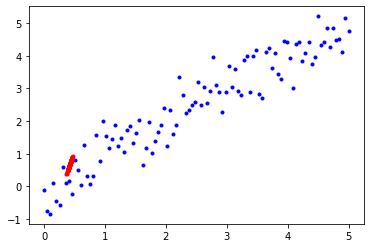

In [10]:
# create data
n_data = 1000
x = torch.linspace(0,5, 100)
y = x + torch.normal(0, 0.5, size=(1,len(x))).flatten()
data = torch.stack((x,y)).t()
print(data.shape)
model.eval()
x_recon = model(data).detach()
data_plot = data.cpu()

# plot data
plt.figure()
plt.plot(data_plot[:,0], data_plot[:,1], "b.")
plt.plot(x_recon[:,0], x_recon[:,1], "r.")
plt.show()

0 tensor(3.8910, grad_fn=<MeanBackward0>)
500 tensor(0.0506, grad_fn=<MeanBackward0>)
1000 tensor(0.0579, grad_fn=<MeanBackward0>)
1500 tensor(0.0571, grad_fn=<MeanBackward0>)


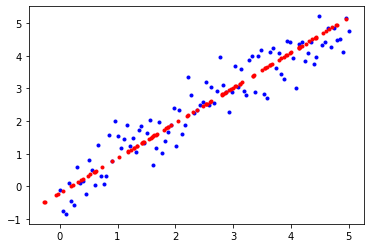

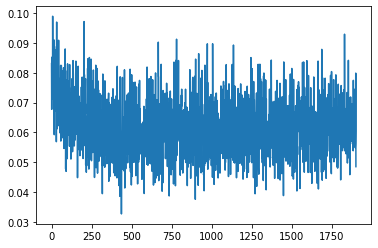

In [11]:
# prepare for training
lr = 1e-3
n_epochs = 2000
losslist = torch.zeros(n_epochs)
n_batch = 64
model.train()
model = Autoencoder()#.to("cuda")
#data = data.to("cuda")
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)
n_data, dim = data.shape

# training loop
for i in range(n_epochs):
    batch_idx = torch.randint(low=0, high=n_data, size=(1,n_batch)).flatten()
    batch = data[batch_idx,:]
    optimizer.zero_grad()
    output = model(batch)
    loss = torch.mean((batch-output)**2)
    if i%500==0:
        print(i, loss)
    loss.backward()
    optimizer.step()
    losslist[i] = loss

#plot data
model.eval()
x_recon = model(data).detach().cpu()
data_plot = data.cpu()
plt.figure()
plt.plot(data_plot[:,0], data_plot[:,1], "b.")
plt.plot(x_recon[:,0], x_recon[:,1], "r.")
plt.show()

# plot training curve
plt.figure()
plt.plot(losslist.detach().numpy()[100:])
plt.show()